### Análise de Dados Para Campanhas de Marketing de Instituições Financeiras

In [1]:
from platform import python_version
print(python_version())

3.9.13


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.2
pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2



In [4]:
# Carregando os dados
df = pd.read_csv("projeto4_analise_de_dados_pyton/dados/dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [6]:
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
df.shape

(45211, 19)

In [8]:
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [9]:
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [10]:
df.drop(['customerid'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [12]:
# Ajustar a coluna jobedu e separa-las em job e edu
df['job'] = df.apply(lambda x: x['jobedu'].split(',')[0], axis = 1)
df['edu'] = df.apply(lambda x: x['jobedu'].split(',')[1], axis = 1)
df.drop(['jobedu'], axis=1, inplace=True)

In [13]:
df.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [14]:
df['age'].isnull().mean()*100, df['age'].isnull().sum()

(0.0442370219636814, 20)

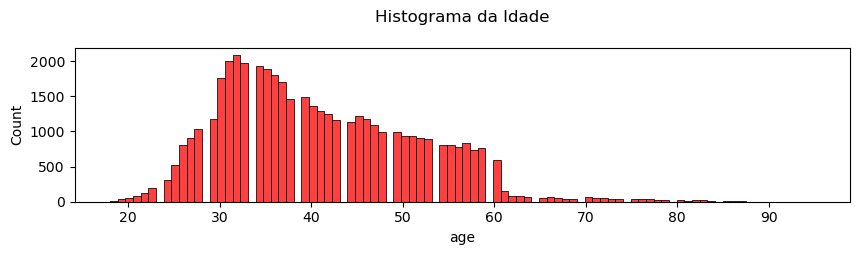

In [15]:
#Histograma
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.histplot(x = df['age'], color = 'red')
plt.title('Histograma da Idade\n')
plt.show()

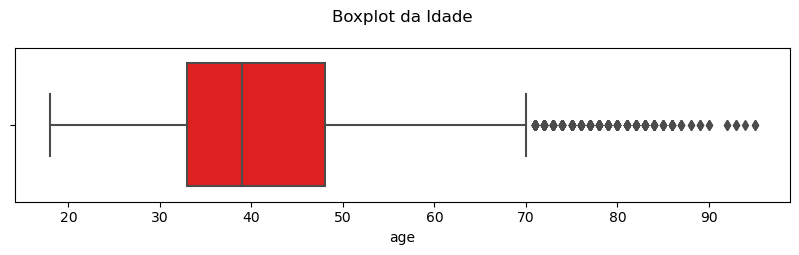

In [16]:
# Boxplot
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.boxplot(x = df['age'], color = 'red')
plt.title('Boxplot da Idade\n')
plt.show()

In [17]:
df['age'].mean(), df['age'].median(), df['age'].mode()

(40.93565090394105,
 39.0,
 0    32.0
 Name: age, dtype: float64)

In [18]:
df['age'].fillna(df['age'].median(), inplace = True)

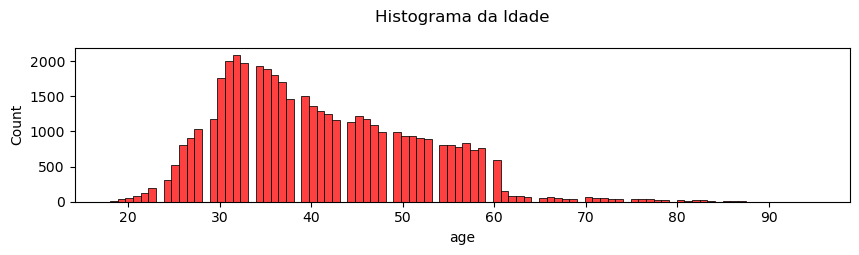

In [19]:
#Histograma
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.histplot(x = df['age'], color = 'red')
plt.title('Histograma da Idade\n')
plt.show()

In [20]:
df['age'].isnull().sum()

0

In [21]:
df['age'].mean(), df['age'].median(), df['age'].mode()

(40.934794629625536,
 39.0,
 0    32.0
 Name: age, dtype: float64)

In [22]:
df['age'] = df['age'].astype('int')

In [23]:
df['month'].isnull().mean()*100

0.11059255490920351

In [24]:
df['month'].dtypes

dtype('O')

In [25]:
df['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [26]:
df['month'].fillna(str(df['month'].mode()[0]), inplace = True)

In [27]:
df['month'].value_counts()

may, 2017    13797
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [28]:
df['month'].isnull().mean()*100

0.0

In [29]:
df['salary'].isnull().sum(), df['salary'].isnull().mean()*100

(26, 0.05750812855278583)

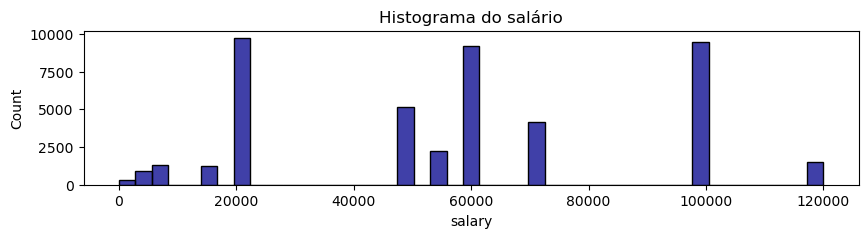

In [30]:
# Histograma do salario
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.histplot(x = df['salary'], color = 'darkblue')
plt.title('Histograma do salário')
plt.show()

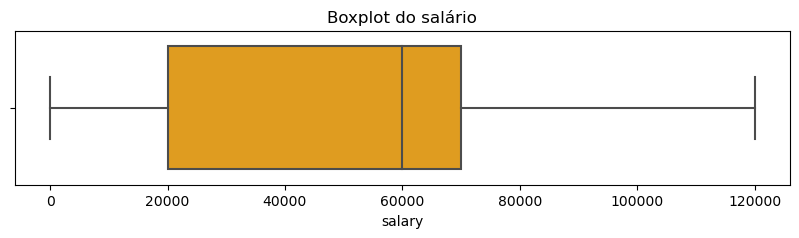

In [31]:
# Boxplot do salario
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.boxplot(x = df['salary'], color = 'orange')
plt.title('Boxplot do salário')
plt.show()

In [32]:
df['salary'].mean(), df['salary'].median(), df['salary'].mode()

(57008.65331415293,
 60000.0,
 0    20000.0
 Name: salary, dtype: float64)

In [33]:
df['salary'].dtypes

dtype('float64')

In [34]:
import math
mediana = df['salary'].median()

def ajusta_salario(salario):
    if salario is None or salario == 0 or math.isnan(salario):
        return mediana
    else:
        return salario
    
df['salary'] = df.apply(lambda x: ajusta_salario(x['salary']), axis = 1)

In [35]:
df['salary'].mean(), df['salary'].median(), df['salary'].mode()

(57392.58145141669,
 60000.0,
 0    20000.0
 Name: salary, dtype: float64)

In [36]:
df['salary'].isnull().sum()

0

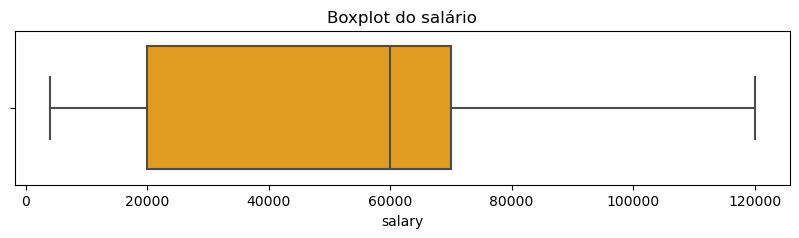

In [37]:
# Boxplot do salario
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.boxplot(x = df['salary'], color = 'orange')
plt.title('Boxplot do salário')
plt.show()

In [38]:
df['month'].isnull().mean()*100

0.0

In [39]:
df['response'].isnull().sum()

30

In [40]:
df['response'].value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [41]:
# deletando os registros sem respostas (variavel target)
df.dropna(subset = ['response'], inplace = True)

In [42]:
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

In [43]:
df['pdays'].isnull().sum()

0

In [44]:
df['pdays'].describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [45]:
df['pdays'] = df['pdays'].apply(lambda x: np.NaN if x == -1.0 else x)

In [46]:
df['pdays'].isnull().sum()

36930

In [47]:
df['pdays'].isnull().mean()*100

81.73789867422147

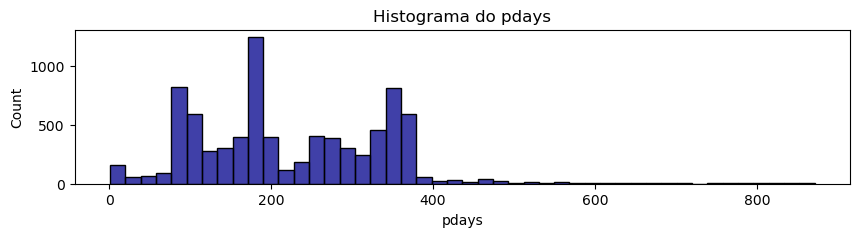

In [48]:
# Histograma do pdays
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.histplot(x = df['pdays'], color = 'darkblue')
plt.title('Histograma do pdays')
plt.show()

In [49]:
df['pdays'].mean(), df['pdays'].median(), df['pdays'].mode()

(224.5961701611926,
 195.0,
 0    182.0
 Name: pdays, dtype: float64)

In [50]:
df.drop(['pdays'], axis = 1, inplace = True)

In [51]:
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

In [52]:
df['marital'].value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

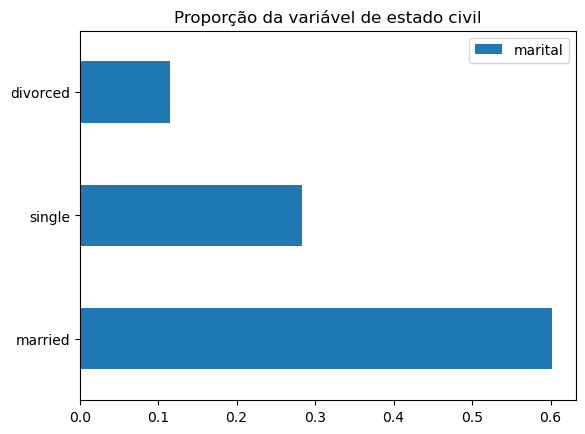

In [53]:
# Plot
df['marital'].value_counts(normalize = True).plot(kind = 'barh')
plt.title('Proporção da variável de estado civil')
plt.legend()
plt.show()

In [54]:
df['job'].value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

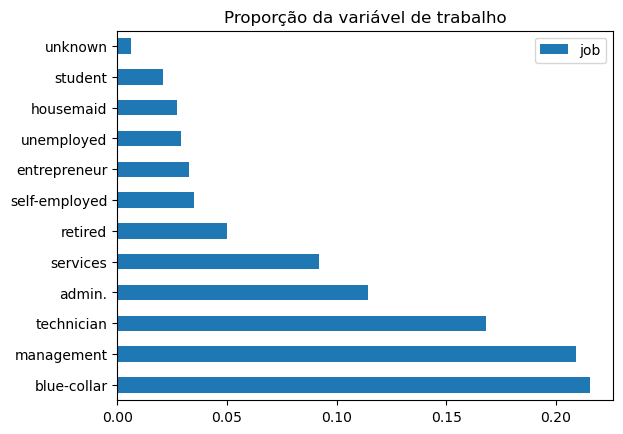

In [55]:
# Plot
df['job'].value_counts(normalize = True).plot(kind = 'barh')
plt.title('Proporção da variável de trabalho')
plt.legend()
plt.show()

In [56]:
df['edu'].value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: edu, dtype: float64

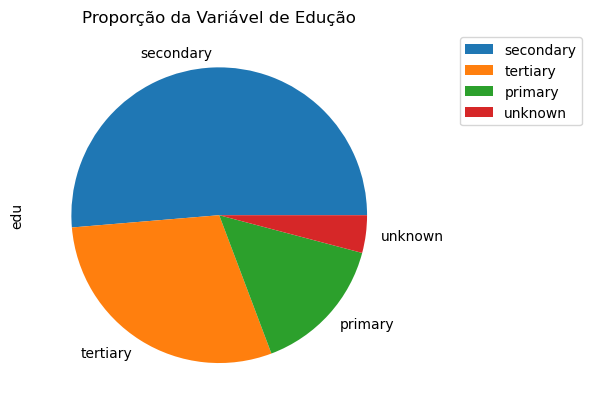

In [57]:
# Plot
df['edu'].value_counts(normalize = True).plot(kind = 'pie')
plt.title('Proporção da Variável de Edução')
plt.legend()
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

In [58]:
df['response'].value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

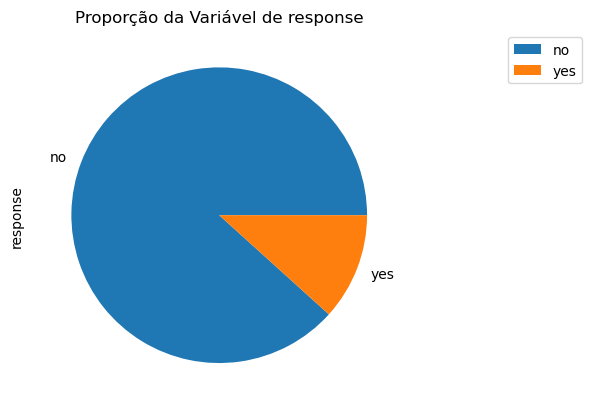

In [59]:
# Plot
df['response'].value_counts(normalize = True).plot(kind = 'pie')
plt.title('Proporção da Variável de response')
plt.legend()
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

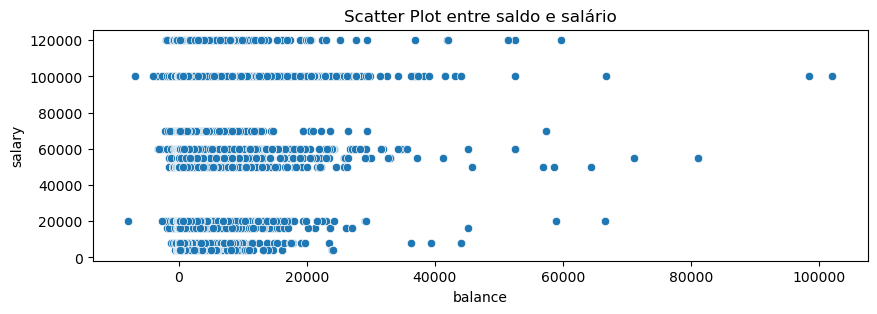

In [60]:
# Scatter Plot
ax, fig = plt.subplots(figsize = (10, 3))
ax = sns.scatterplot(df['balance'], df['salary'])
plt.title('Scatter Plot entre saldo e salário')
plt.show()

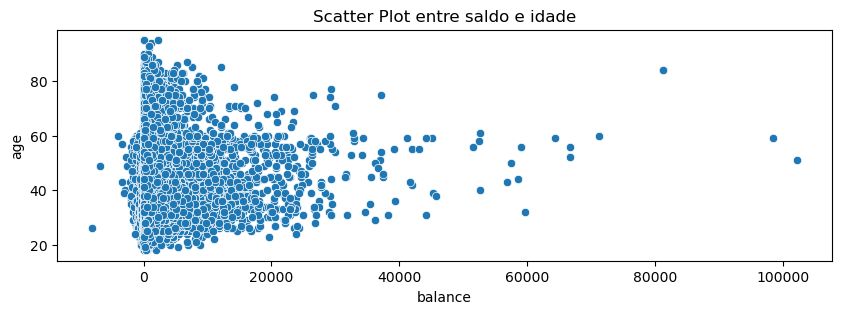

In [61]:
# Scatter Plot
ax, fig = plt.subplots(figsize = (10, 3))
ax = sns.scatterplot(df['balance'], df['age'])
plt.title('Scatter Plot entre saldo e idade')
plt.show()

In [62]:
# Correlação
res = df[['salary', 'balance', 'age']].corr()

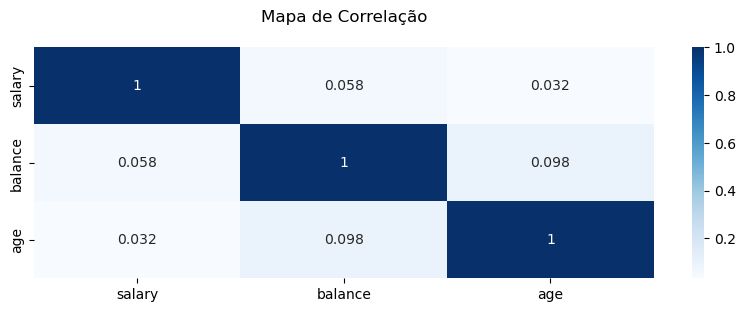

In [63]:
# Mapa de correlação
ax, fig = plt.subplots(figsize = (10, 3))
sns.heatmap(res, annot = True, cmap = 'Blues')
plt.title('Mapa de Correlação\n')
plt.show()

In [64]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ['response'])['salary'].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [65]:
# Agrupa o salário pela variável resposta e calcula a mediana
df.groupby(by = ['response'])['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

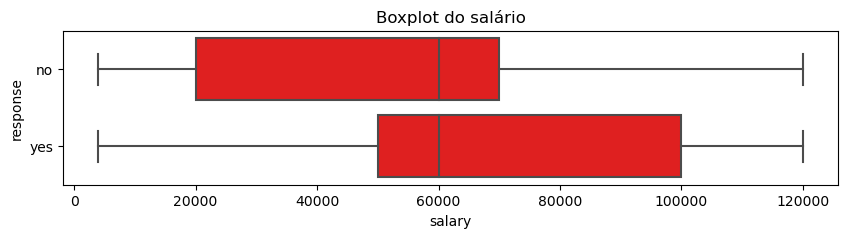

In [66]:
# Boxplot
ax, fig = plt.subplots(figsize = (10, 2))
ax = sns.boxplot(x = df['salary'], y = df['response'], color = 'red')
plt.title('Boxplot do salário')
plt.show()

In [67]:
# Agrupa a educação pela variável salario e calcula a média
df.groupby(by = ['edu'])['salary'].mean()

edu
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [68]:
df['response_flag'] = np.where(df['response'] == 'yes', 1, 0)

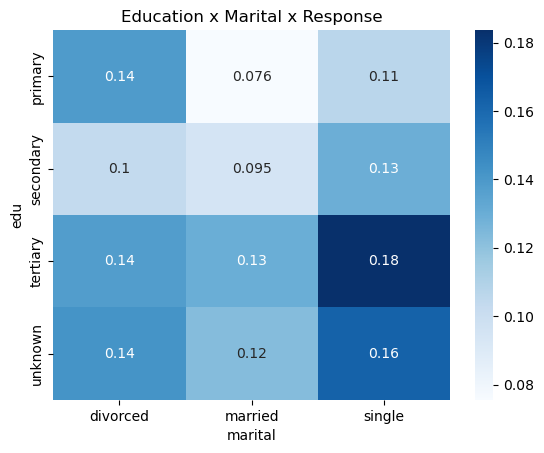

In [69]:
# Correlação
res1 = df.pivot_table(index = 'edu', columns = 'marital', values = 'response_flag', aggfunc = 'mean')
sns.heatmap(res1 , annot = True, cmap = 'Blues')
plt.title('Education x Marital x Response')
plt.show()